# Would Donald Trump Have Won The 2020 US Election If The Electoral System Leans More Towards Popular Votes?

## Introductory

The Electoral College system has been a concrete part of the US presidential election since the founding of the country. In this system, the citizens of each state cast their votes for their choice of electors, who will cast their votes for the presidential candidates. The number of electors of each state is the sum of the number of Senates and the number of Representatives. The Electoral College consists of 538 electors in total, and each elector's vote is counted as 1 vote in the general election. In the end, the candidate who wins over the majority - which means 270 votes - wins the election. The system was created out of good intention to balance the power of small states and large states, however, criticism is getting louder after several instances in which the winner of the popular vote did not win the election due to the outcome of the Electoral College vote. This has led to questions about whether the system accurately represents the will of the US citizens and if there might be a better way to elect the President.

In this research paper, we will explore what might have happened if different electoral systems had been in place in the 2020 election, specifically, the systems have no intermediaries such as the electors, the citizens will directly vote for the presidential candidates, and each citizen's vote is precisely counted. We assume different level of majoritarian implication to establish comparison among systems. The details of how voting ais weighted is explained in the #Variables#. With the county being the core electoral level, the result of the voting will be more likely to accurately reflect the will comes from the root. The goal of this paper is to determine if alternate electoral systems would have resulted in a different outcome in the 2020 election, specifically, if Donald Trump would have won the election.

### Variables
Function f: Electoral Strategy
1. State-level majoritarian
1.1 each state has same number of votes as its number of voters, votes based on which party won the majority of counties
1.2 each state has one vote, votes based on which party won the majority of counties

2. County-level majoritarian
2.1 each county has same number of votes as its voters, cast all of its votes based on which party won the majority of votes
2.2 each county has one vote, cast its vote on the party won the majority


Variable X1: Area

Variable X2: Party

Variable X3: Raw Votes

Variable Y1: Fabricated Votes of One Area of One Party
Y1 = f(X1, X2, X3), where f could be f_1.1, f_1.2, f_2.1, f_2.2
(Area, Party, Votes): The votes that the party obtained against the strategy within one geographical area, could be at the state level or at the county level.

Variable Y2: Donald Trump winning election or not
True if won, False if lost.

Votes obtained by Party in one Area



### Outcome
Donald Trump winning election or not: True if won, False if lost.

## Data Cleaning/Loading

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [17]:
df = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county_candidate.csv')
df_pc = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county.csv')
df_geo = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/uscities.csv')
pd.set_option('display.max_columns', None)
df['county'] = df['county'].str.replace(' County', '')
df.drop(df[df['won'] == False].index, inplace = True)
df_geo.drop(['city', 'city_ascii', 'state_id', 'county_fips', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id', 'population', 'density'], axis = 1, inplace = True)
df_geo.rename(columns={"state_name": "state", "county_name": "county"}, inplace = True)
df_geo.drop_duplicates(
  subset = ['state', 'county'],
  keep = 'first', inplace = True)
df20 = pd.merge(df, df_geo, on=['county', 'state'], how = 'left')

df20['total_votes'] = df_pc['current_votes']
df20.head(10)

,state,county,candidate,party,total_votes,won,lat,lng,population,density
0,Delaware,Kent,Joe Biden,DEM,87025,True,39.1610,-75.5202,125931.0,617.0
1,Delaware,New Castle,Joe Biden,DEM,287633,True,39.7415,-75.5416,70655.0,2503.0
2,Delaware,Sussex,Donald Trump,REP,129352,True,38.9091,-75.4227,11463.0,449.0
3,District of Columbia,Ward 1,Joe Biden,DEM,41681,True,38.9072,-77.0369,82404.0,12910.0
4,District of Columbia,Ward 2,Joe Biden,DEM,32881,True,38.9063,-77.0340,76492.0,4624.0
5,District of Columbia,Ward 3,Joe Biden,DEM,44231,True,38.9884,-77.0900,82450.0,3059.0
6,District of Columbia,Ward 4,Joe Biden,DEM,45296,True,38.9310,-77.0380,86085.0,3740.0
7,District of Columbia,Ward 5,Joe Biden,DEM,46107,True,38.9717,-77.0089,88948.0,3369.0
8,District of Columbia,Ward 6,Joe Biden,DEM,62918,True,38.8869,-76.9896,102233.0,6893.0
9,District of Columbia,Ward 7,Joe Biden,DEM,38384,True,38.8582,-76.9478,81270.0,3734.0


In [76]:
df_state = df.groupby(["state", "candidate", "party"]).sum()
df_state.rename(columns={"won": "# of counties won"}, inplace = True)
#add 3 level of MultiIndex
df_state.index = [df_state.index.get_level_values(0),
            df_state.index.get_level_values(1),
                  df_state.index.get_level_values(2)]
df_state = df_state.reset_index() \
       .sort_values(['state','# of counties won'], ascending=[True,False]) \
       .set_index(['state','party'])
df_state.drop(['total_votes'], axis = 1, inplace = True)
df_state.head(10)

/var/folders/ww/ygv9855j1kg902lgct5j96840000gn/T/ipykernel_16749/3108784327.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_state = df.groupby(["state", "candidate", "party"]).sum()


candidate  # of counties won
state      party                                 
Alabama    REP    Donald Trump                 54
           DEM       Joe Biden                 13
Alaska     REP    Donald Trump                 20
           DEM       Joe Biden                 17
           WRI       Write-ins                  3
Arizona    REP    Donald Trump                 10
           DEM       Joe Biden                  5
Arkansas   REP    Donald Trump                 67
           DEM       Joe Biden                  8
California DEM       Joe Biden                 35

In [ ]:
#df20.to_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/data2.csv')

In [114]:
df_state1 = df_state.copy()
df_state1.reset_index(inplace=True)
df_state1.drop_duplicates(
  subset = ['state'],
  keep = 'first', inplace = True)
df_state1 = df_state1.reset_index(drop=True)
df_state1.head()

,state,party,candidate,# of counties won
0,Alabama,REP,Donald Trump,54
1,Alaska,REP,Donald Trump,20
2,Arizona,REP,Donald Trump,10
3,Arkansas,REP,Donald Trump,67
4,California,DEM,Joe Biden,35


#df_ps = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_state.csv')
#df_ps['party_won'] = df_state1['party']
df_ps.sort_values(by=['state'], ascending=True, inplace = True)
df_ps = df_ps.reset_index(drop=True)
df_ps['party_won'] = df_state1['party']
df_ps

In [115]:
df_state2 = df20.copy()
df_state2.drop(['candidate'], axis = 1, inplace = True)
df_state2.drop(['party'], axis = 1, inplace = True)
df_state2 = pd.merge(df_state2, df_state1, on = 'state', how = 'left')
df_state2.head()

,state,county,total_votes,won,lat,lng,population,density,party,candidate,# of counties won
0,Delaware,Kent,87025,True,39.1610,-75.5202,125931.0,617.0,DEM,Joe Biden,2
1,Delaware,New Castle,287633,True,39.7415,-75.5416,70655.0,2503.0,DEM,Joe Biden,2
2,Delaware,Sussex,129352,True,38.9091,-75.4227,11463.0,449.0,DEM,Joe Biden,2
3,District of Columbia,Ward 1,41681,True,38.9072,-77.0369,82404.0,12910.0,DEM,Joe Biden,8
4,District of Columbia,Ward 2,32881,True,38.9063,-77.0340,76492.0,4624.0,DEM,Joe Biden,8


/var/folders/ww/ygv9855j1kg902lgct5j96840000gn/T/ipykernel_16749/4110459830.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data = df_mainland_1_1, x = "lng", y = "lat", hue = "party", size = "total_votes",


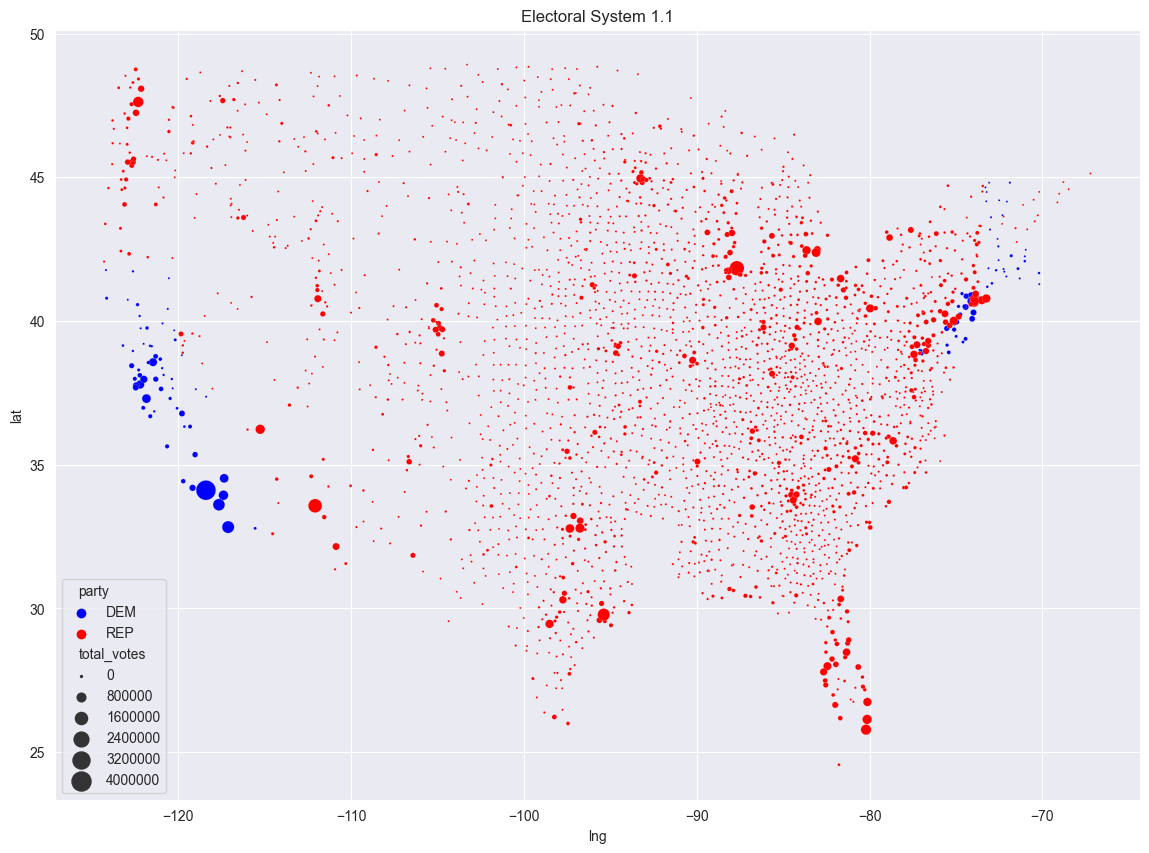

In [111]:

df_mainland_1_1 = df_state2[~df20["state"].isin(["Alaska", "Hawaii"])]

plt.figure(figsize = (14,10))
sns.scatterplot(data = df_mainland_1_1, x = "lng", y = "lat", hue = "party", size = "total_votes",
                sizes = (2, 200), palette = ['blue','red','yellow'])
plt.title("Electoral System 1.1");

/var/folders/ww/ygv9855j1kg902lgct5j96840000gn/T/ipykernel_16749/1296180186.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data = df_mainland_1_1, x = "lng", y = "lat", hue = "party", size = "total_votes",


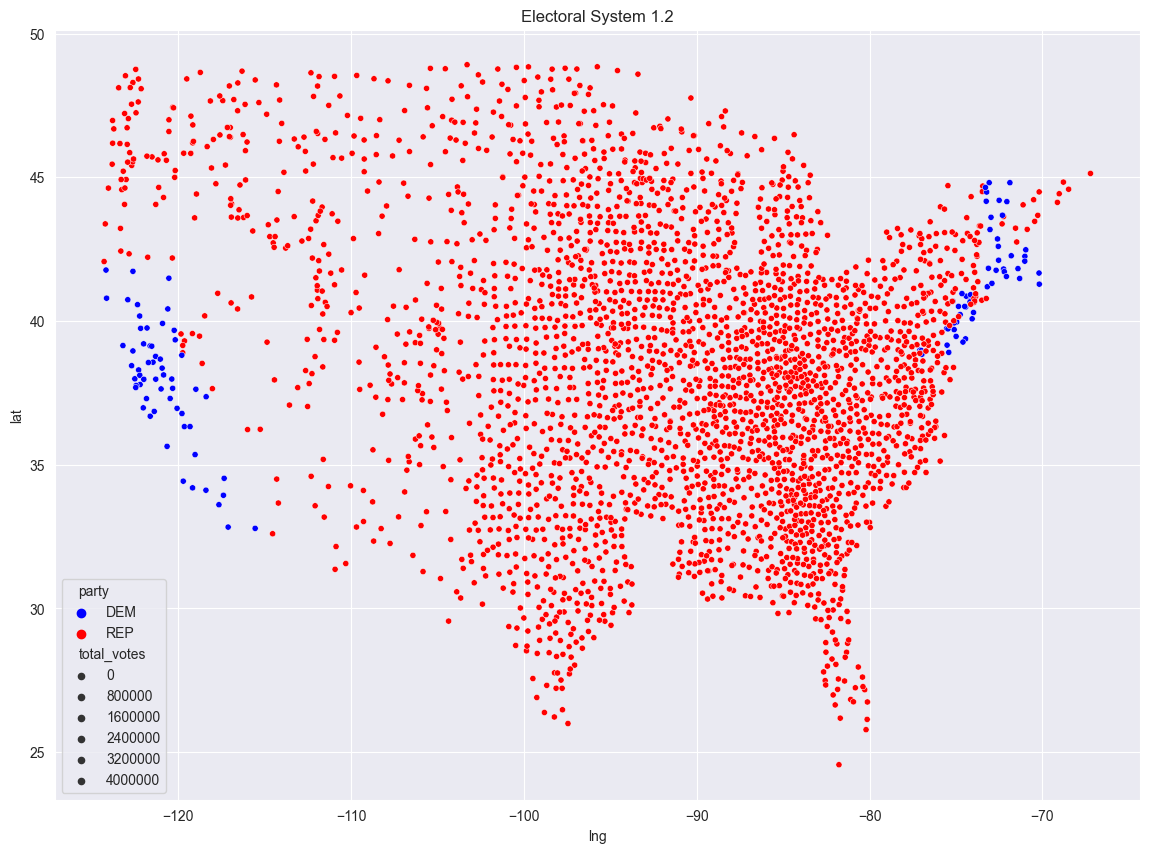

In [113]:
df_mainland_1_2 = df_state2[~df20["state"].isin(["Alaska", "Hawaii"])]

plt.figure(figsize = (14,10))
sns.scatterplot(data = df_mainland_1_1, x = "lng", y = "lat", hue = "party", size = "total_votes",
                sizes = (20, 20), palette = ['blue','red','yellow'])
plt.title("Electoral System 1.2");

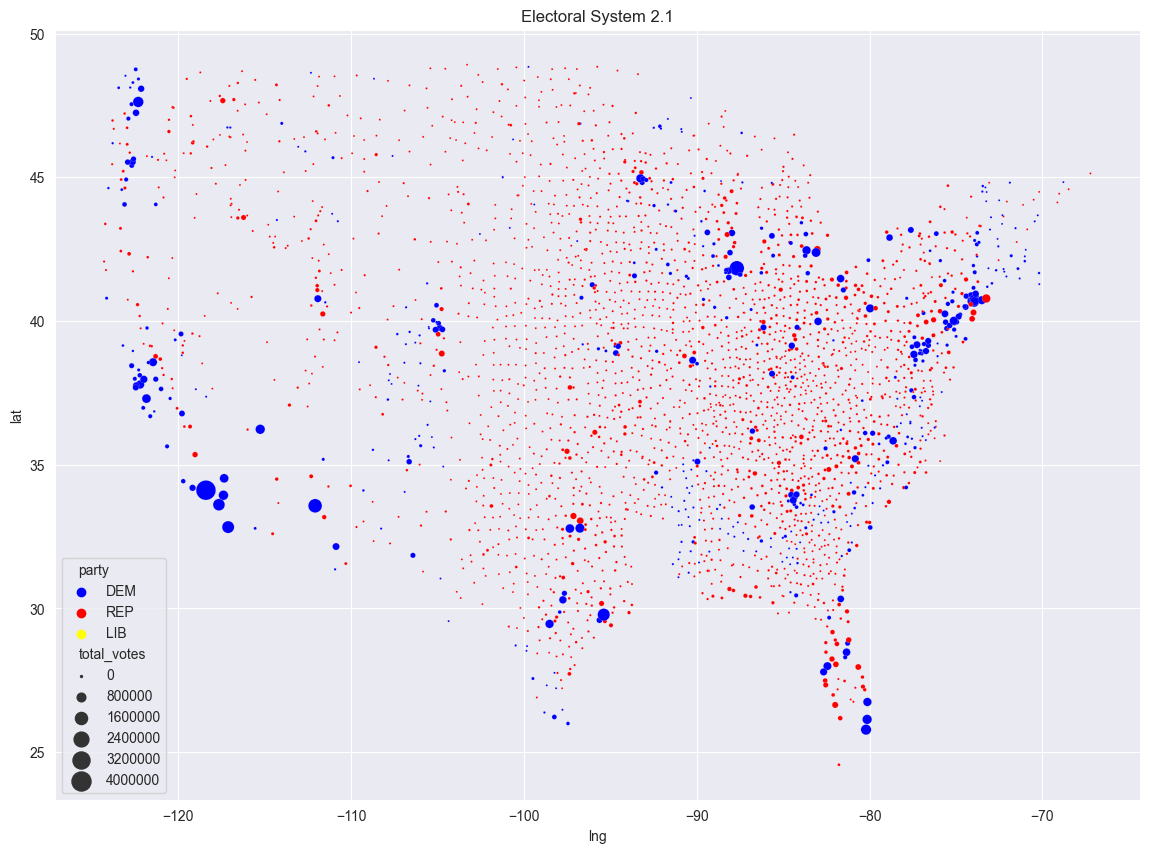

In [95]:
df_mainland = df20[~df20["state"].isin(["Alaska", "Hawaii"])]

plt.figure(figsize = (14,10))
sns.scatterplot(data = df_mainland, x = "lng", y = "lat", hue = "party", size = "total_votes",
                sizes = (2, 200), palette = ['blue','red','yellow'])
plt.title("Electoral System 2.1");

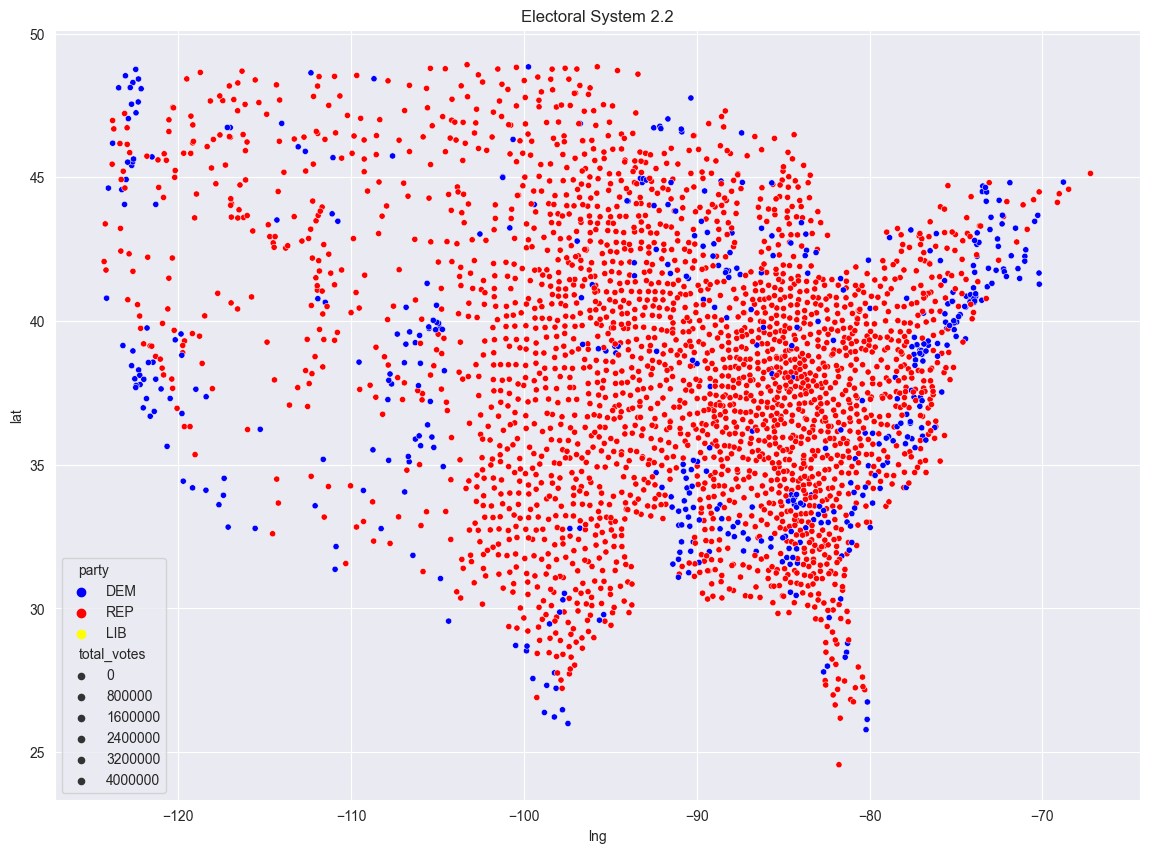

In [29]:
df_mainland = df20[~df20["state"].isin(["Alaska", "Hawaii"])]

plt.figure(figsize = (14,10))
sns.scatterplot(data = df_mainland, x = "lng", y = "lat", hue = "party", size = "total_votes",
                sizes = (20, 20), palette = ['blue','red','yellow'])
plt.title("Electoral System 2.2");


State-level
1. each state has same number of votes as its voters, votes based on which party won the majority of counties
2. each state has one vote, votes based on which party won the majority of counties

County-level
1. each county has same number of votes as its voters, cast all of its votes based on which party won the majority of votes
2. each county has one vote, cast its vote on the party won the majority


In [226]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd


In [240]:
usa = gpd.read_file('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/cb_2021_us_state_20m/cb_2021_us_state_20m.shp')
gpd_state = usa[~usa["NAME"].isin(["Alaska", "Hawaii", "Puerto Rico"])]


In [239]:
gpd_state


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,22,01629543,0400000US22,22,LA,Louisiana,00,111915258185,23736382213,"POLYGON ((-94.04305 32.69303, -94.04303 32.797..."
2,24,01714934,0400000US24,24,MD,Maryland,00,25151992308,6979074857,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
3,55,01779806,0400000US55,55,WI,Wisconsin,00,140292321657,29343646672,"MULTIPOLYGON (((-86.93428 45.42115, -86.83575 ..."
4,12,00294478,0400000US12,12,FL,Florida,00,138961722096,45972570361,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ..."
5,13,01705317,0400000US13,13,GA,Georgia,00,149486624386,4418360134,"POLYGON ((-85.60516 34.98468, -85.47434 34.983..."
6,47,01325873,0400000US47,47,TN,Tennessee,00,106791957894,2322601737,"POLYGON ((-90.30070 35.02879, -90.26530 35.040..."
7,27,00662849,0400000US27,27,MN,Minnesota,00,206232627084,18949394733,"POLYGON ((-97.22904 49.00069, -96.93096 48.999..."
8,19,01779785,0400000US19,19,IA,Iowa,00,144659721012,1085964740,"POLYGON ((-96.62188 42.77925, -96.57794 42.827..."
9,29,01779791,0400000US29,29,MO,Missouri,00,178052333716,2487445715,"POLYGON ((-95.76565 40.58521, -95.53318 40.582..."
10,26,01779789,0400000US26,26,MI,Michigan,00,146614937132,103871870536,"MULTIPOLYGON (((-84.61622 45.89447, -84.51789 ..."


In [230]:
gpd_state.tail()


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
47,44,01219835,0400000US44,44,RI,Rhode Island,00,2677763359,1323686988,"MULTIPOLYGON (((-71.63147 41.16668, -71.59334 ..."
48,18,00448508,0400000US18,18,IN,Indiana,00,92789363558,1541248299,"POLYGON ((-88.05947 37.86669, -88.04086 37.891..."
49,34,01779795,0400000US34,34,NJ,New Jersey,00,19048916230,3533083369,"POLYGON ((-75.55945 39.62981, -75.53514 39.647..."
50,04,01779777,0400000US04,04,AZ,Arizona,00,294363973043,855871553,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
51,31,01779792,0400000US31,31,NE,Nebraska,00,198957385713,1371105730,"POLYGON ((-104.05314 41.11446, -104.05245 41.2..."


<AxesSubplot:>

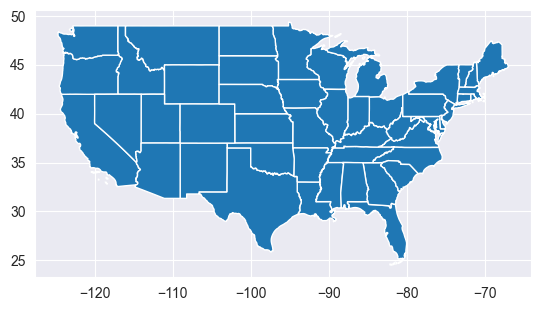

In [241]:
gpd_state.plot()


<AxesSubplot:>

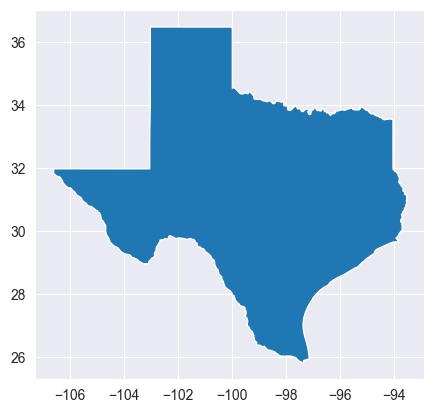

In [232]:
usa[usa.STUSPS == 'TX'].plot()


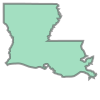

In [233]:
usa.loc[0, 'geometry']


In [242]:
usa_county = gpd.read_file('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/cb_2021_us_county_20m/cb_2021_us_county_20m.shp')
gpd_county = usa_county[~usa_county["STATE_NAME"].isin(["Alaska", "Hawaii", "Puerto Rico"])]

<AxesSubplot:>

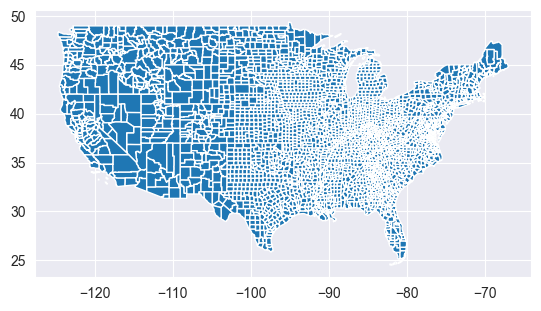

In [245]:
gpd_county.plot()


In [236]:
usa_county.head()


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,13,239,00350547,0500000US13239,13239,Quitman,Quitman County,GA,Georgia,06,391703076,24158295,"POLYGON ((-85.14183 31.83926, -85.11403 31.893..."
1,18,111,00450376,0500000US18111,18111,Newton,Newton County,IN,Indiana,06,1040539827,4349506,"POLYGON ((-87.52665 41.16609, -87.39380 41.162..."
2,19,053,00465215,0500000US19053,19053,Decatur,Decatur County,IA,Iowa,06,1377569408,4138626,"POLYGON ((-94.01480 40.89703, -93.55654 40.898..."
3,24,013,01696228,0500000US24013,24013,Carroll,Carroll County,MD,Maryland,06,1159355859,13112464,"POLYGON ((-77.21702 39.72022, -76.99932 39.720..."
4,29,155,00758532,0500000US29155,29155,Pemiscot,Pemiscot County,MO,Missouri,06,1275841039,53915406,"POLYGON ((-89.96131 36.38880, -89.75215 36.386..."


In [ ]:
df_state_plot = df_state_won.copy()
df_state_plot.rename(columns={
    'share of counties in the winning states': 'share of counties in the states'},
                     inplace=True)
df_state_plot1 = df_state_lost.copy()
df_state_plot1.rename(columns={
    'share of counties in the losing states': 'share of counties in the states'},
                      inplace=True)
df_state_plot = pd.concat([df_state_plot, df_state_plot1])
#df_state_plot
#plt.figure(figsize = (20,15))
#sns.scatterplot(data = df_state_plot, x = "# of counties won", y = '# of total counties', hue = "won", size = "# of counties won", palette = "coolwarm", sizes=(10,200))
#plt.title("2020 Trump Voting On State Level")
plt.figure(figsize=(20, 15))
sns.scatterplot(data=df_state_plot, x="share of counties in the states",
                y='# of counties won', hue="won", size="# of total counties",
                palette="coolwarm", sizes=(10, 200))
plt.title("2020 Trump Voting On State Level")


In [ ]:
plt.figure(figsize = (14,10))
sns.scatterplot(data = df_state_mainland, x = "lng", y = "lat", hue = "party", size = "total_votes",
                sizes = (20, 20), palette = ['blue', 'red'])
plt.title("Electoral System IV");


From Project 2: map for III

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
gpd_state.plot(
    ax=ax, edgecolor='black', column='party', legend=True, cmap='RdBu_r',
    vmin=0, vmax=1,
    alpha=gpd_state['total_votes'] / gpd_state['total_votes'].max()
)
for idx, row in gpd_state.iterrows():
    name = row['STUSPS']
    if name in ['VT', 'NH', 'MA', 'RI', 'CT', 'NJ', 'MD', 'DE', 'DC', 'CA']:
        coords = row.geometry.centroid.coords[0]
        if name in ['MA', 'NH', 'JE']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-1),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['VT']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]-1, coords[1]+2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['NJ']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+1.5, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['RI', 'DC']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['CT']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['DE']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['CA']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='white', linewidth=2))
    else:
        ax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14)
ax.axis('off')
plt.title("Electoral System IV")
plt.show()
